In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [1]:
from scipy.optimize import curve_fit
import scipy.io.wavfile as wavfile
import scipy.signal
import math
from scipy.interpolate import interp1d

# Káosz (Chua-áramkörös megvalósítással)

# 1. feladat: Ismerkedés a kapcsolással

Az alábbi képen a kaotikus oszcillátor áramköri megvalósítása látható.
<img src="supplementary/chua.png" alt="Chua áramkör">
A kép tetején három BNC csatlakozó balról jobbra sorrendben: bemenet, amit az áramkör komponenseinek karakterisztikavizsgálatakor használunk és két kimenet. A kép bal alsó részén két helikális változtatható ellenállást látunk, ezekkel lehet a visszacsatolási hurokban az erősítést befolyásolni, ez a vizsgálandó rendszer rendszer kontroll paramétere. A bal oldali a finom- a jobb oldali a durvahangolást valósítja meg. 

A kontrollparaméter aktuális ellenállásértékét az asztali `DVM`-mel mérheti úgy, hogy az áramkörön az `Ell_meres` kapcsolót a megfelelő állásba billenti. *Megjegyzés:* Az ellenállás mérés során természetesen az áramkör nem oszcillál tovább, a további viselkedés tanulmányozásához ne felejtse visszakapcsolni az ellenállást az áramkörbe.

### 1.1. A lineáris elemek karakterisztikája - 4 pont

Gerjessze négyszögjellel az áramkör kondenzátorbó és tekercsből épített részét! Ehhez a bal oldali BNC bementre kösse a függvénygenerátort, és a középső BNC kimeneten vizsgállja a válaszjelet oszcilloszkóp segítségével. 

Ebben a kísérletben a visszacsatolási hurkot meg kell szakítani, és a külső gerjesztést rá kell kapcsolni az áramkör megfelelő blokkjaira. Ezt a képen látható alsó kapcsoló felfele billentésével éri el.

Állapítsa meg a rendszerre jellemző karakterisztikus időket, a sajátfrekvenciát és a csillapítást.

In [3]:
t_proba=np.linspace(362,1152,200)

In [4]:
def csill(t,A,gamma,omega,phase):
    return A*e**(-gamma*t)*cos(omega*t + phase) 
    

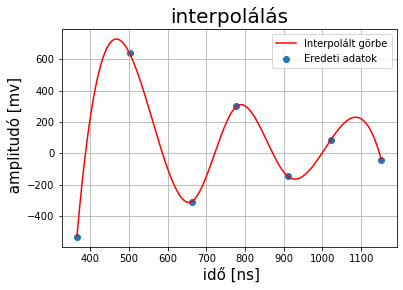

In [5]:
# Az adatok
Ax = np.array([366, 502, 662, 778, 910, 1022, 1152])
Ay = np.array([-2013, -845.6, -1790, -1183, -1627, -1395, -1522])
mean = Ay.mean()
Ay2 = Ay - mean

interpolation = interp1d(Ax, Ay2, kind='cubic') 


x_interp = np.linspace(min(Ax), max(Ax), 10000)  #probáltam minél nagyobbra állítani, hogy pontosabb legyen.
y_interp = interpolation(x_interp)

#interpoláció
plt.scatter(Ax, Ay2, label='Eredeti adatok')
plt.plot(x_interp, y_interp, 'r', label='Interpolált görbe')
plt.xlabel(' idő [ns]', size = 15)
plt.ylabel(' amplitudó [mv]', size = 15)
plt.title("interpolálás", size = 20)
plt.legend()
plt.grid(True)
plt.show()



In [6]:
popt, pcov = curve_fit(csill, x_interp, y_interp, p0=[-500, 0.00097, pi/131, 10])
perr = np.sqrt(np.diag(pcov))

print(popt)
print(perr)

[-3.98991119e+03  3.61270293e-03  1.91246263e-02  1.28604307e+01]
[6.79773363e+01 3.11346699e-05 2.56418547e-05 1.27556952e-02]


In [7]:
round(popt[3],3)

12.86

In [8]:
round(perr[3],3)

0.013

In [9]:
#sajátfrekvencia
omega = round(popt[2],5)
print(round(omega/2*pi,5))

0.03003


Text(0.5, 1.0, 'illesztés')

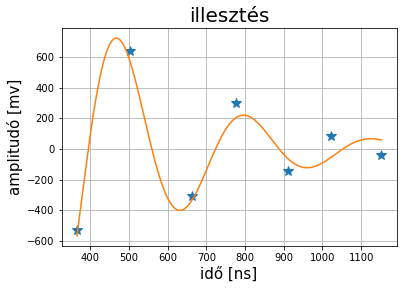

In [10]:
plot(Ax,Ay2, ls =" ", marker = "*", ms = 10)
plot(x_interp,csill(x_interp,*popt))
grid(True)
plt.xlabel('idő [ns]', size = 15)
plt.ylabel('amplitudó [mv]', size = 15)
plt.title("illesztés", size = 20)

In [11]:
y_felso = Ay2[1::2]
t_felso = Ax[1::2]

In [12]:
omega =-log(y_felso/y_felso[0])* (1/(t_felso)) #képlettel való probálkozások
print(omega.mean())

0.0009717589904226889


In [13]:
(Ax[1:]-Ax[:-1]).mean() #frekvencia meghatározásának próbája

131.0

### 1.2. A nemlineáris elem karakterisztikája - 4 pont

Mérje ki háromszögjel segítségével a visszacsatolási körben a műveleti erősítővel megvalósított _negatív ellenállás_ karakterisztikáját. 

Ebben a kísérletben (ugyanúgy, mint az 1.2. részfeladatban) a visszacsatolási hurkot meg kell szakítani, és a külső gerjesztést rá kell kapcsolni az áramkör megfelelő blokkjaira. Ezt a képen látható alsó kapcsoló felfele billentésével éri el.

Rögzítse és elemezze a karakterisztikát!
Vizsgálja meg azt is, hogy ez a karakterisztika függ-e a frekvenciától.

<img src="nonlin2-2khz.png" alt="Negatív ellenállás karakterisztikája">

A rögzítés alatt sajnálatos módon a kép készítést értettem, így útólag az alapján, próbáltam meg a lehető legpontosabban újrakonsturálni a karakterisztikát.

In [14]:
x1=[-0.4,0.4]
y1 = [-0.6,0.6]
x2 = [0.4,1.5]
y2 = [0.6,1.7]
x3 = [-0.4,-1.5]
y3 = [-0.6,-1.7]

#meredekségek
toresx1 = [-0.4,-0.4]
ytores1 = [-1.7,-0.6]
toresx2 = [-1.5,-0.4]
toresy2 = [-1.7,-1.7]

toresy3 = [0.6,0.6]

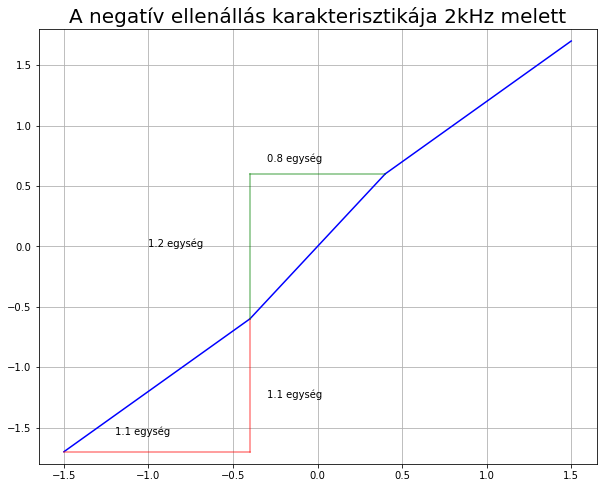

In [15]:
figsize(10,8)
#jel rekrealása
plot(x1,y1, color = "b")
plot(x2,y2, color ="b")
plot(x3,y3, color = "b")

#meredekségek
plot(toresx1,ytores1, color = "r", alpha= 0.5)
plot(toresx2,toresy2, color = "r", alpha= 0.5)
plt.text(-0.3,-1.25,s="1.1 egység")
plt.text(-1.2,-1.56,s="1.1 egység")

plot(toresx1,y1, color = "g", alpha = 0.5)
plot(x1,toresy3, color = "g", alpha =  0.5)
plt.text(-1,0,"1.2 egység")
plt.text(-0.3,0.7,"0.8 egység")
plt.title("A negatív ellenállás karakterisztikája 2kHz melett", size = 20)
ylim(-1.8,1.8)
grid(True)

A két oldalsó szakasz meredksége így: 1, míg a középső szakaszon: 1.5. Hogy vizsgáljam a negatív ellenállás karakterisztikájának frekvenciafüggőségét a következő felvételt szándékosan egy nagyon eltérő frekvencián 20kHz-en készítettem el.

<img src="nonlin2-20khz.png" alt="Negatív ellenállás karakterisztikája 20kHz">

In [16]:

x20_1 = [-0.6,0.2] #0.8
y20_1 = [-0.5,0.7] #1.2


x20_2 = [-0.6,-1.5] # 0.9
y20_2 = [-0.5,-1.5] #1

x20_3 = [0.2,1.2] #1
y20_3 = [0.7,1.8] #1.1


#segédvonalak
yseged1 = [-1.5,-1.5]
xseged1 = [-0.6,-0.6]
yseged2 = [0.7,0.7]


Text(0.5, 1.0, 'A negatív ellenállás karakterisztikája 20kHz melett')

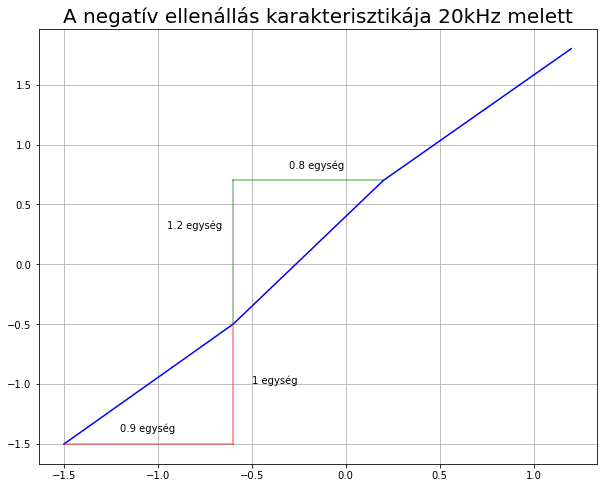

In [17]:
plot(x20_1,y20_1, color = "b")
plot(x20_2,y20_2, color = "b")
plot(x20_3,y20_3, color = "b")
grid(True)

plot(x20_2,yseged1, color = "r", alpha = 0.5)
plot(xseged1,y20_2, color = "r", alpha = 0.5)
plt.text(-1.2,-1.4,"0.9 egység")
plt.text(-0.5,-1,'1 egység')

plot(xseged1,y20_1, color = "g", alpha = 0.5)
plot(x20_1,yseged2, color = "g", alpha = 0.5)
plt.text(-0.3,0.8,"0.8 egység")
plt.text(-0.95,0.3,"1.2 egység")

plt.title("A negatív ellenállás karakterisztikája 20kHz melett", size = 20)

A középső szakasz meredeksége most is 1.5 lett, azonban a külső szakaszé 1.1. Mint a képen is látszik a jel elcsúszott az origból ezzel nehezítve a leolvasásokat, így ezt a 0.1 tizedes különbséget inkább leolvasási hibának vettem. Összeségében kimondhatom, hogy a karakterisztika frekvencia független

## 2. Az áramkör működésének különböző fázisai - 6 pont

Ebben a kísérletben a visszacsatolási hurkot fel kell építeni az áramkör blokkjai között. Ezt a képen látható alsó kapcsoló lefele billentésével éri el.

Kösse be az oszcilloszkópot a _Chua-kapcsolás_ két kondenzátorának erősített kimenetére, a középső és jobb oldali BNC kimenetek. 

Vizsgálja meg a jelek időfejlődését. Hosszabb jelalakok rögzítésére használja az `audacity` programot. _Figyelem:_ Amennyiben a PC hangártyája túlvezérelt jelet rögzít, a bemeneti előerősítést szoftverből csökkenteni kell.

A mérés során keletkező fájlokat _wav_ formátumba exportálja, és ne felejtse a notebook mellé feltölteni!

Azonosítsuk a legfontosabb tartományokat:
* periodikus tartomány,
* periodus kettőződés,
* kaotikus viselkedés,
* _double-scroll_ folyamat.

Ezekről készítsen ábrákat.

In [18]:
#st5.reset_temperature()

In [19]:
# hangfájlok betöltése
sample_period, audio_period = wavfile.read('periodikus.wav')

sample_kettos, audio_kettos = wavfile.read("kettozodes.wav")

sample_kaosz, audio_kaosz = wavfile.read('kaotikus.wav')

sample_double, audio_double = wavfile.read('doublescroll.wav')


Text(0.5, 0.98, 'Az áramkör működésének különböző fázisai')

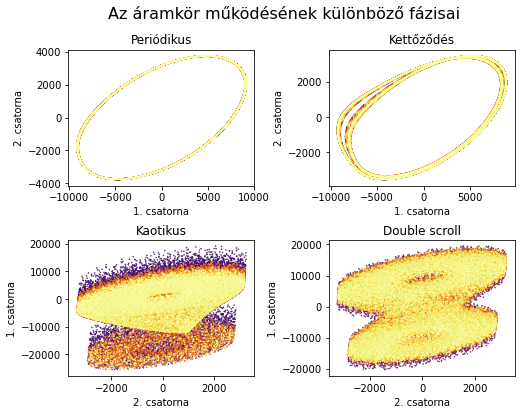

In [20]:
fig, axs = plt.subplots(2, 2, figsize=(8, 6))

axs[0, 0].scatter(audio_period[:,0], audio_period[:,1], c=np.arange(len(audio_period[:,1])), cmap='inferno', marker='.', s=1)
axs[0, 0].set_title('Periódikus')
axs[0,0].set_xlabel ('1. csatorna')
axs[0,0].set_ylabel ('2. csatorna')

# A második szubplot (jobb felső) adatokkal

axs[0, 1].scatter(audio_kettos[:,0], audio_kettos[:,1], c=np.arange(len(audio_kettos[:,1])), cmap='inferno', marker='.', s=1)
axs[0, 1].set_title('Kettőződés')
axs[0,1].set_xlabel ('1. csatorna')
axs[0,1].set_ylabel ('2. csatorna')

# A harmadik szubplot (bal alsó) adatokkal

axs[1, 0].scatter(audio_kaosz[:,1], audio_kaosz[:,0], c=np.arange(len(audio_kaosz[:,0])), cmap='inferno', marker='.', s=1)
axs[1, 0].set_title('Kaotikus')
axs[1,0].set_ylabel ('1. csatorna')
axs[1,0].set_xlabel ('2. csatorna')

# A negyedik szubplot (jobb alsó) adatokkal

axs[1, 1].scatter(audio_double[:,1], audio_double[:,0], c=np.arange(len(audio_double[:,0])), cmap='inferno', marker='.', s=1)
axs[1, 1].set_title('Double scroll')
axs[1,1].set_ylabel ('1. csatorna')
axs[1,1].set_xlabel ('2. csatorna')

plt.subplots_adjust(wspace=0.4, hspace=0.4)
fig.suptitle('Az áramkör működésének különböző fázisai', fontsize=16)

Text(0.5, 0.98, 'Az áramkör működésének különböző fázisai')

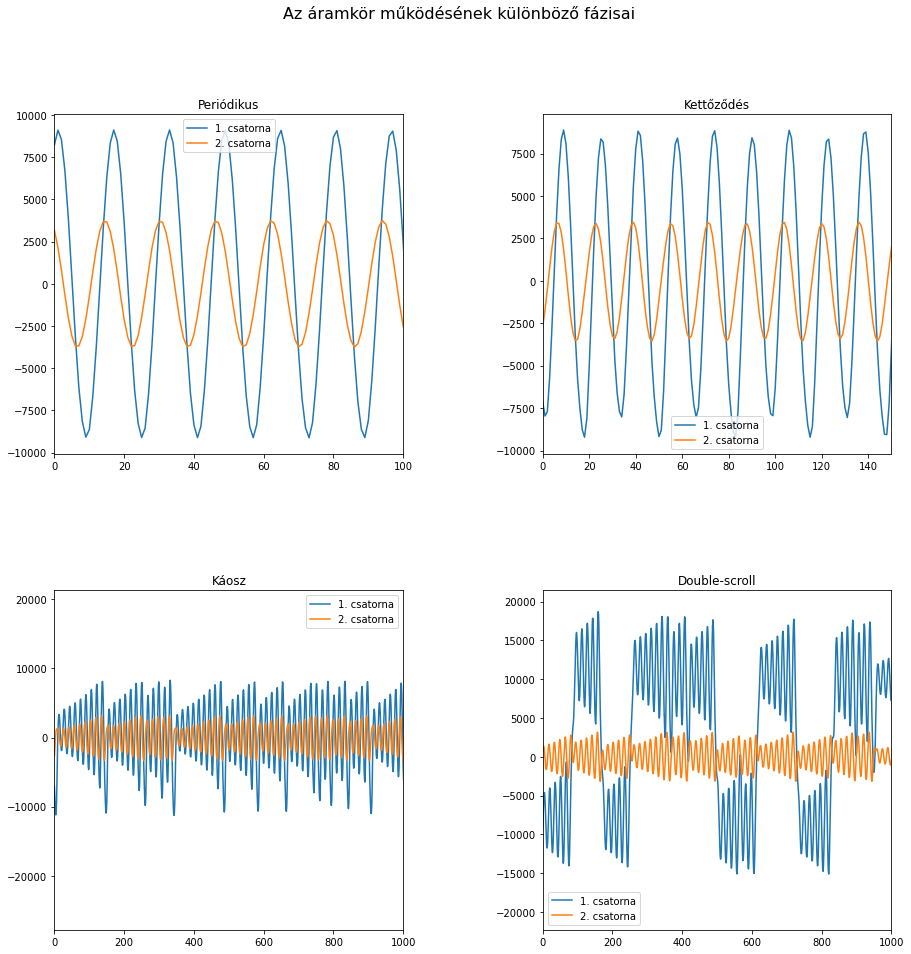

In [21]:
fig, axs = plt.subplots(2, 2, figsize=(15, 15))

t1 = list(range(0,len(audio_period[:,0])))
axs[0, 0].plot(t1,audio_period[:,0], label = "1. csatorna")
axs[0, 0].plot(t1,audio_period[:,1], label = "2. csatorna")
axs[0, 0].set_title('Periódikus')
axs[0,0].set_xlim(0,100)
axs[0,0].legend()

# A második szubplot (jobb felső) adatokkal
t2 = list(range(0,len(audio_kettos[:,0])))
axs[0, 1].plot(t2,audio_kettos[:,0], label = "1. csatorna")
axs[0, 1].plot(t2,audio_kettos[:,1], label = "2. csatorna")
axs[0, 1].set_title('Kettőződés')
axs[0,1].set_xlim(0,150)
axs[0,1].legend()


# A harmadik szubplot (bal alsó) adatokkal

t3 = list(range(0,len(audio_kaosz[:,0])))
axs[1, 0].plot(t3,audio_kaosz[:,0], label = "1. csatorna")
axs[1, 0].plot(t3,audio_kaosz[:,1], label = "2. csatorna")
axs[1, 0].set_title('Káosz')
axs[1,0].set_xlim(0,1000)
axs[1,0].legend()
# A negyedik szubplot (jobb alsó) adatokkal

t4 = list(range(0,len(audio_double[:,0])))
axs[1, 1].plot(t4,audio_double[:,0], label = "1. csatorna")
axs[1, 1].plot(t4,audio_double[:,1], label = "2. csatorna")
axs[1, 1].set_title('Double-scroll')
axs[1,1].set_xlim(0,1000)
axs[1,1].legend()
plt.subplots_adjust(wspace=0.4, hspace=0.4)
fig.suptitle('Az áramkör működésének különböző fázisai', fontsize=16)

# Fotók:

### Periodikus fázis

<img src="periodikus.png" alt="Periodikus fázis">

### Kettőződés

<img src="kettozodes.png" alt="Periodikus kettőződéses fázis">

### Kaotikus viselkedés

<img src="kaotikus.png" alt="Kaotikus fázis">

A kaoikus fázis keresése folyamán nem sikerült tökeletesen beállítani a kontroll paramétert, mert mint a hangfájlból látjuk, már elkezdett belenyúlni a double-scroll fázisba.

### Double scroll

<img src="doublescroll.png" alt="Double-scroll fázis">

### 2.1. Bifurkációs pontok felvétele - 3 pont

Próbljon keresni több olyan paraméter értéket, ahol perioduskettőződés (bifurkáció) jelenik meg, és gyűjtse ki a megfelelő $R_k$ értékeket! 

Hányad rendig tudja szemmel követni a bifurkációs pontokat?

Teljesül a Feigenbaum-féle

$$ \lim_{k\rightarrow\infty}\frac{R_k-R_{k-1}}{R_{k+1}-R_k}=\delta\approx 4{,}6692... $$

összefüggés?

In [22]:
bipontok = array([1.874,1.862,1.859]) 
delta = (bipontok[1]-bipontok[0])/(bipontok[2]-bipontok[1])
print(round(delta,9))

4.0


Mint látjuk egész pontosan sikerült megközelíteni az értéket. Természetesen a voltmérő ingadozása, és a bifurkációs pontok pontatlan leolvasása miatt szinte lehetetlen kimérni a tökéletes értéket. 

### 2.2. Bifurkációs diagramm felvétele - 6 pont

A kontroll paraméter lépésenkénti változtatása mellett készítsük el a rendszer bifurkációs diagramját. 

* Magyarázza el kvalitatíven miért jelenik meg oszcilláció, miért mozdul ki a rendszer a triviális fixpontjából?
* Mit tapasztal, követi a kaotikus tartományt újabb periodikus szakasz?
* Megjelenik intermittens viselkedés?

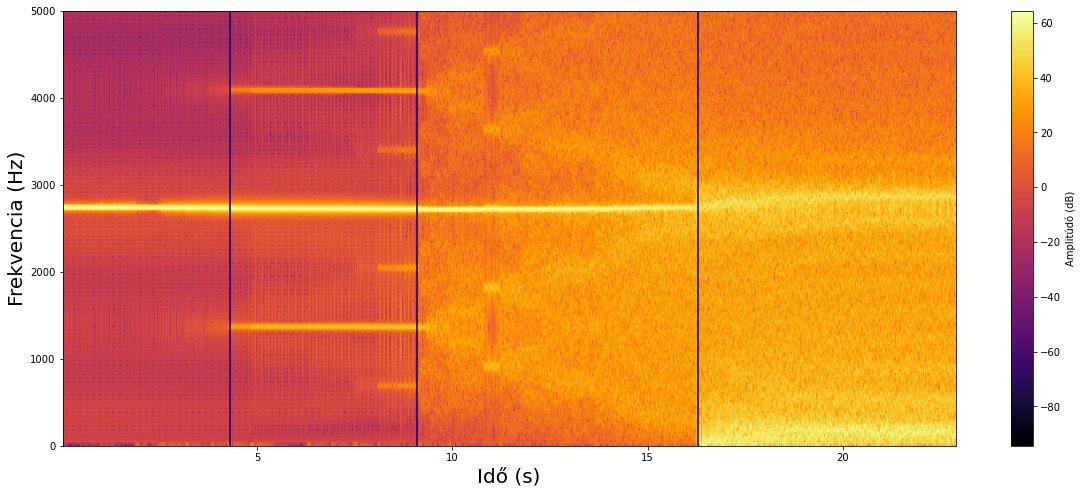

In [23]:
sample_rate, audio_data = wavfile.read('diagramm2.wav')

data = audio_data[:,0] +audio_data[:,1]

# Spektrogram készítése
plt.figure(figsize=(20, 8))
plt.specgram(data, Fs=sample_rate, cmap='inferno', NFFT=2000, noverlap=1000)

# Tengelyek címkézése
plt.xlabel('Idő (s)', size = 20)
plt.ylabel('Frekvencia (Hz)',size = 20)

# Színtérkép alkalmazása
plt.colorbar(label='Amplitúdó (dB)')
# Ábra megjelenítése
plt.ylim(0, 5000)
y = [0,5400]
x = [4.3,4.3]
x2 = [9.1,9.1]
x3 = [16.3,16.3]
plot(x,y, color = "darkblue")
plot(x2,y, color = "darkblue")
plot(x3,y, color = "darkblue")
plt.show()



# Elemzés:

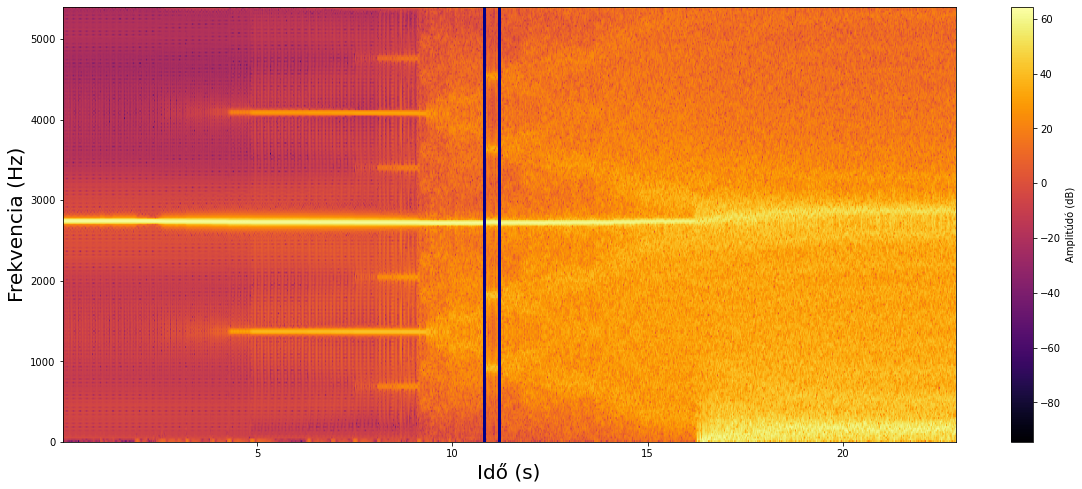

In [24]:
sample_rate, audio_data = wavfile.read('diagramm2.wav')

data = audio_data[:,0] +audio_data[:,1]

# Spektrogram készítése
plt.figure(figsize=(20, 8))
plt.specgram(data, Fs=sample_rate, cmap='inferno', NFFT=2000, noverlap=1000)

# Tengelyek címkézése
plt.xlabel('Idő (s)', fontsize = 20)
plt.ylabel('Frekvencia (Hz)',fontsize = 20)

# Színtérkép alkalmazása
plt.colorbar(label='Amplitúdó (dB)')
# Ábra megjelenítése
plt.ylim(0, 5400) #lelimitáltam, mert itt volt a legszebben kivehető

y = [0,5400]
x = [4.3,4.3]
x2 = [8,8]
x3 = [9.1,9.1]
x4 = [10.8,10.8]
x5 = [11.2,11.2]
x7 = [16.3,16.3]
#plot(x,y, color ="darkblue")
#plot(x2,y, color = "darkblue")
#plot(x3,y,color = "darkblue")
plot(x4,y,color = "darkblue", lw = 3)
plot(x5,y,color = "darkblue", lw = 3)
#plot(x7,y,color = "darkblue")

plt.show()



### 2.3. Spektrum elemzése - 3 pont

Szerkessze meg a 2.2. részfeladatban felvett idősorok Fourier-spektrumait. Határoza meg a fő csúcsokat! Hogyan változnak a spektrumcsúcsok a kontroll paraméter függvényében?

# periodikus

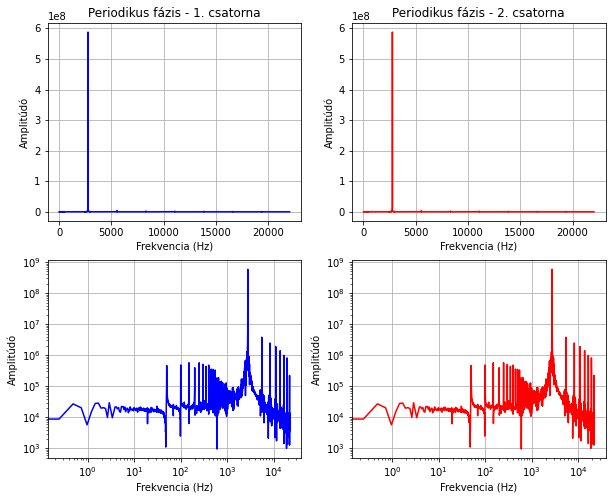

In [25]:
sample_period, audio_period = wavfile.read('periodikus.wav')
fft_result = np.fft.fft(audio_period[:,0])
frequencies = np.fft.fftfreq(len(fft_result), 1.0 / sample_period)
fft_result = np.abs(fft_result)
positive_frequencies = frequencies[:len(frequencies) // 2]
positive_fft_result = fft_result[:len(fft_result) // 2] #pozitív frekvenciákat helyeztem fókuszba
#plt.plot(positive_frequencies, positive_fft_result)
#kettes csatorna
fft_result2 = np.fft.fft(audio_period[:,1])
frequencies2 = np.fft.fftfreq(len(fft_result2), 1.0 / sample_period)
fft_result2 = np.abs(fft_result2)
positive_frequencies2 = frequencies[:len(frequencies2) // 2]
positive_fft_result2 = fft_result[:len(fft_result2) // 2] #pozitív frekvenciákat helyeztem fókuszba
#plt.plot(positive_frequencies, positive_fft_result)



fig, axs = plt.subplots(2, 2, figsize=(10, 8))
axs[0,0].set_xlabel('Frekvencia (Hz)')
axs[0,0].set_ylabel('Amplitúdó')
axs[0,0].set_title('Periodikus fázis - 1. csatorna')
axs[0,0].grid(True)
axs[0,0].plot(positive_frequencies,positive_fft_result, color = "b")
axs[1,0].loglog(positive_frequencies,positive_fft_result, color = "b")
axs[1,0].set_xlabel('Frekvencia (Hz)')
axs[1,0].set_ylabel('Amplitúdó')
axs[1,0].grid(True)

#2. csatorna
axs[0,1].set_xlabel('Frekvencia (Hz)')
axs[0,1].set_ylabel('Amplitúdó')
axs[0,1].set_title('Periodikus fázis - 2. csatorna')
axs[0,1].grid(True)
axs[0,1].plot(positive_frequencies,positive_fft_result, color = "r")
axs[1,1].loglog(positive_frequencies,positive_fft_result, color = "r")
axs[1,1].set_xlabel('Frekvencia (Hz)')
axs[1,1].set_ylabel('Amplitúdó')
axs[1,1].grid(True)

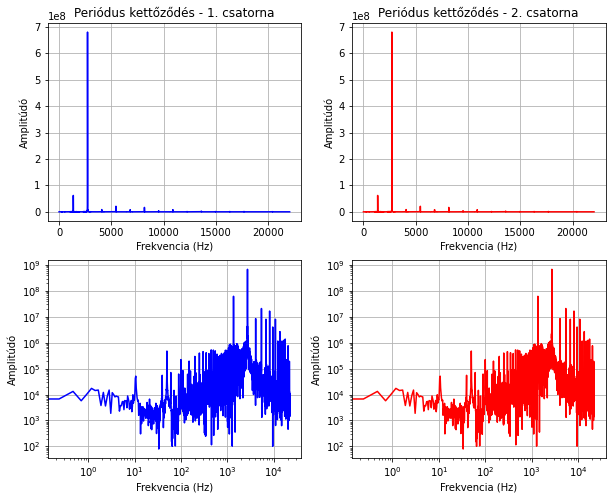

In [26]:
sample_double, audio_double = wavfile.read('kettozodes.wav')
fft_result = np.fft.fft(audio_double[:,0])
frequencies = np.fft.fftfreq(len(fft_result), 1.0 / sample_period)
fft_result = np.abs(fft_result)
positive_frequencies = frequencies[:len(frequencies) // 2]
positive_fft_result = fft_result[:len(fft_result) // 2] #pozitív frekvenciákat helyeztem fókuszba
#plt.plot(positive_frequencies, positive_fft_result)
#kettes csatorna
fft_result2 = np.fft.fft(audio_double[:,1])
frequencies2 = np.fft.fftfreq(len(fft_result2), 1.0 / sample_period)
fft_result2 = np.abs(fft_result2)
positive_frequencies2 = frequencies[:len(frequencies2) // 2]
positive_fft_result2 = fft_result[:len(fft_result2) // 2] #pozitív frekvenciákat helyeztem fókuszba
#plt.plot(positive_frequencies, positive_fft_result)



fig, axs = plt.subplots(2, 2, figsize=(10, 8))
axs[0,0].set_xlabel('Frekvencia (Hz)')
axs[0,0].set_ylabel('Amplitúdó')
axs[0,0].set_title('Periódus kettőződés - 1. csatorna')
axs[0,0].grid(True)
axs[0,0].plot(positive_frequencies,positive_fft_result, color = "b")
axs[1,0].loglog(positive_frequencies,positive_fft_result, color = "b")
axs[1,0].set_xlabel('Frekvencia (Hz)')
axs[1,0].set_ylabel('Amplitúdó')
axs[1,0].grid(True)

#2. csatorna
axs[0,1].set_xlabel('Frekvencia (Hz)')
axs[0,1].set_ylabel('Amplitúdó')
axs[0,1].set_title('Periódus kettőződés - 2. csatorna')
axs[0,1].grid(True)
axs[0,1].plot(positive_frequencies,positive_fft_result, color = "r")
axs[1,1].loglog(positive_frequencies,positive_fft_result, color = "r")
axs[1,1].set_xlabel('Frekvencia (Hz)')
axs[1,1].set_ylabel('Amplitúdó')
axs[1,1].grid(True)

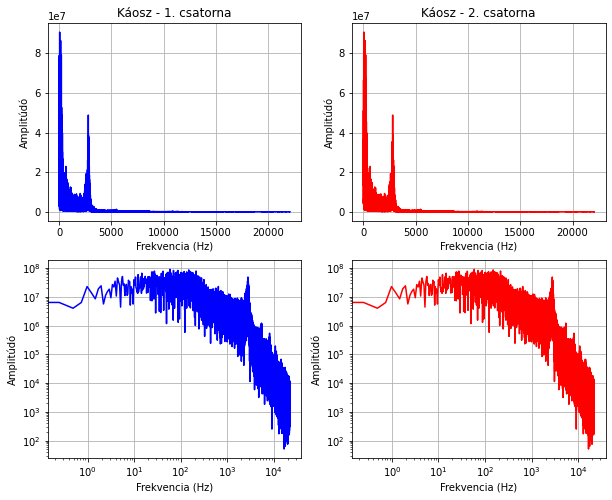

In [27]:
sample_double, audio_chaos = wavfile.read('doublescroll.wav')
fft_result = np.fft.fft(audio_chaos[:,0])
frequencies = np.fft.fftfreq(len(fft_result), 1.0 / sample_period)
fft_result = np.abs(fft_result)
positive_frequencies = frequencies[:len(frequencies) // 2]
positive_fft_result = fft_result[:len(fft_result) // 2] #pozitív frekvenciákat helyeztem fókuszba
#plt.plot(positive_frequencies, positive_fft_result)
#kettes csatorna
fft_result2 = np.fft.fft(audio_chaos[:,1])
frequencies2 = np.fft.fftfreq(len(fft_result2), 1.0 / sample_period)
fft_result2 = np.abs(fft_result2)
positive_frequencies2 = frequencies[:len(frequencies2) // 2]
positive_fft_result2 = fft_result[:len(fft_result2) // 2] #pozitív frekvenciákat helyeztem fókuszba
#plt.plot(positive_frequencies, positive_fft_result)



fig, axs = plt.subplots(2, 2, figsize=(10, 8))
axs[0,0].set_xlabel('Frekvencia (Hz)')
axs[0,0].set_ylabel('Amplitúdó')
axs[0,0].set_title('Káosz - 1. csatorna')
axs[0,0].grid(True)
axs[0,0].plot(positive_frequencies,positive_fft_result, color = "b")
axs[1,0].loglog(positive_frequencies,positive_fft_result, color = "b")
axs[1,0].set_xlabel('Frekvencia (Hz)')
axs[1,0].set_ylabel('Amplitúdó')
axs[1,0].grid(True)

#2. csatorna
axs[0,1].set_xlabel('Frekvencia (Hz)')
axs[0,1].set_ylabel('Amplitúdó')
axs[0,1].set_title('Káosz - 2. csatorna')
axs[0,1].grid(True)
axs[0,1].plot(positive_frequencies,positive_fft_result, color = "r")
axs[1,1].loglog(positive_frequencies,positive_fft_result, color = "r")
axs[1,1].set_xlabel('Frekvencia (Hz)')
axs[1,1].set_ylabel('Amplitúdó')
axs[1,1].grid(True)

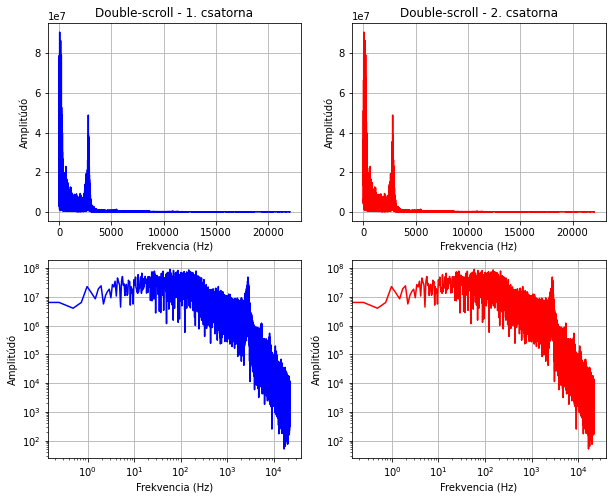

In [28]:
sample_ds, audio_ds = wavfile.read('doublescroll.wav')
fft_result = np.fft.fft(audio_ds[:,0])
frequencies = np.fft.fftfreq(len(fft_result), 1.0 / sample_period)
fft_result = np.abs(fft_result)
positive_frequencies = frequencies[:len(frequencies) // 2]
positive_fft_result = fft_result[:len(fft_result) // 2] #pozitív frekvenciákat helyeztem fókuszba
#plt.plot(positive_frequencies, positive_fft_result)
#kettes csatorna
fft_result2 = np.fft.fft(audio_ds[:,1])
frequencies2 = np.fft.fftfreq(len(fft_result2), 1.0 / sample_period)
fft_result2 = np.abs(fft_result2)
positive_frequencies2 = frequencies[:len(frequencies2) // 2]
positive_fft_result2 = fft_result[:len(fft_result2) // 2] #pozitív frekvenciákat helyeztem fókuszba
#plt.plot(positive_frequencies, positive_fft_result)



fig, axs = plt.subplots(2, 2, figsize=(10, 8))
axs[0,0].set_xlabel('Frekvencia (Hz)')
axs[0,0].set_ylabel('Amplitúdó')
axs[0,0].set_title('Double-scroll - 1. csatorna')
axs[0,0].grid(True)
axs[0,0].plot(positive_frequencies,positive_fft_result, color = "b")
axs[1,0].loglog(positive_frequencies,positive_fft_result, color = "b")
axs[1,0].set_xlabel('Frekvencia (Hz)')
axs[1,0].set_ylabel('Amplitúdó')
axs[1,0].grid(True)

#2. csatorna
axs[0,1].set_xlabel('Frekvencia (Hz)')
axs[0,1].set_ylabel('Amplitúdó')
axs[0,1].set_title('Double-scroll - 2. csatorna')
axs[0,1].grid(True)
axs[0,1].plot(positive_frequencies,positive_fft_result, color = "r")
axs[1,1].loglog(positive_frequencies,positive_fft_result, color = "r")
axs[1,1].set_xlabel('Frekvencia (Hz)')
axs[1,1].set_ylabel('Amplitúdó')
axs[1,1].grid(True)

### 2.4. Az információs entrópia viselkedése - 5 pont

A 2.2. részfeladat idősorait feldolgozva vegye fel a kimenő jelek/jelkeverék csúcsértékeinek eloszlását, és értékelje ki a $H = -\sum\limits^{4096}_{i=1}p_i\log_2 p_i$ szerinti információs entrópiát.
Elemezze tapasztalatait.

In [29]:
def Entropia(p_array):
    
    H = 0
    p_array = np.array(p_array)
    
    for i in range(0, 250):
        if p_array[i] > 0:  # Csak pozitív értékeket számolunk
            H += np.float128(p_array[i]) * np.float128(math.log2(p_array[i]))  # indexelés miatt 0-ról indítjuk
    
    return (-H)


# Periodikus

Text(0.5, 1.0, 'A csúcsértékek eloszlása')

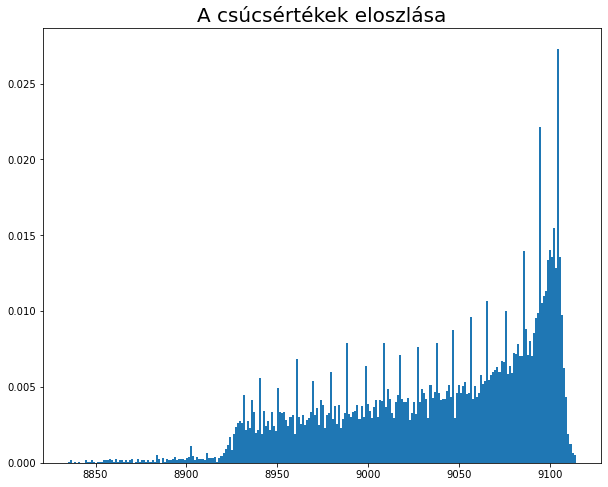

In [30]:
peaks_period=scipy.signal.find_peaks(audio_period[:,0])
poincare_samples_period = audio_period[peaks_period[0],0]
hist_values1, bin_edges, _ = plt.hist(poincare_samples_period, bins=250, density = True) # densityvel végzem a normálást
plt.title("A csúcsértékek eloszlása", size = 20)

In [31]:
round(Entropia(hist_values1),3)

6.65

# Periódus kettőződés:

Text(0.5, 1.0, 'A csúcsértékek eloszlása')

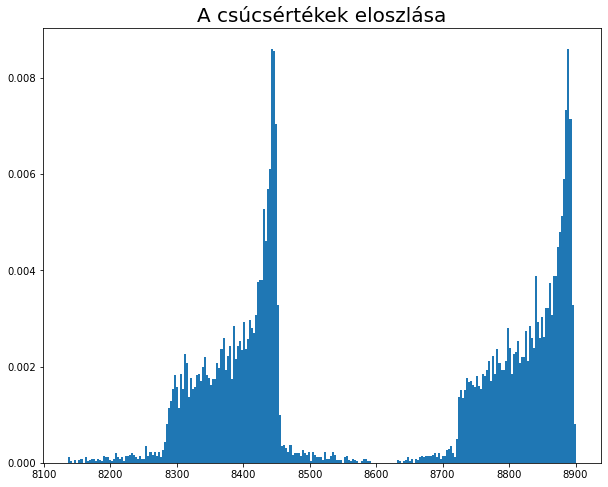

In [32]:
peaks_double=scipy.signal.find_peaks(audio_double[:,0])
poincare_samples_double = audio_double[peaks_double[0],0]
hist_values2, bin_edges, _ = plt.hist(poincare_samples_double, bins=250, density = True) # densityvel végzem a normálást
plt.title("A csúcsértékek eloszlása", size = 20)

In [33]:
round(Entropia(hist_values2),3)

2.794

Text(0.5, 1.0, 'A csúcsértékek eloszlása')

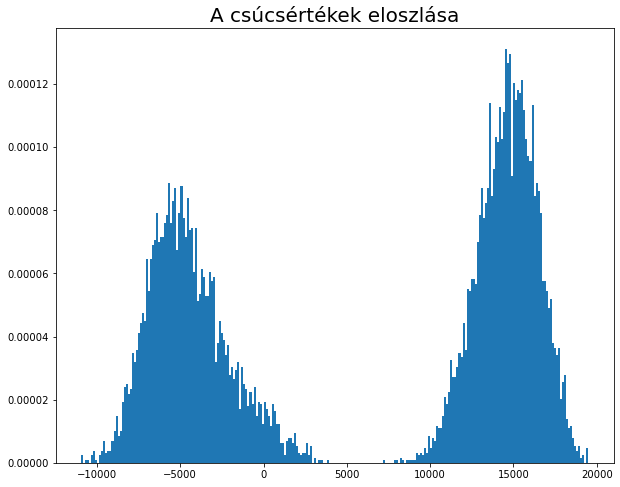

In [34]:
peaks_chaos=scipy.signal.find_peaks(audio_chaos[:,0])
poincare_samples_chaos = audio_chaos[peaks_chaos[0],0]
hist_values3, bin_edges, _ = plt.hist(poincare_samples_chaos, bins = 250, density = True) # densityvel végzem a normálást
plt.title("A csúcsértékek eloszlása", size = 20)

In [35]:
round(Entropia(hist_values3),3)

0.115

# Double-scroll

Text(0.5, 1.0, 'A csúcsértékek eloszlása')

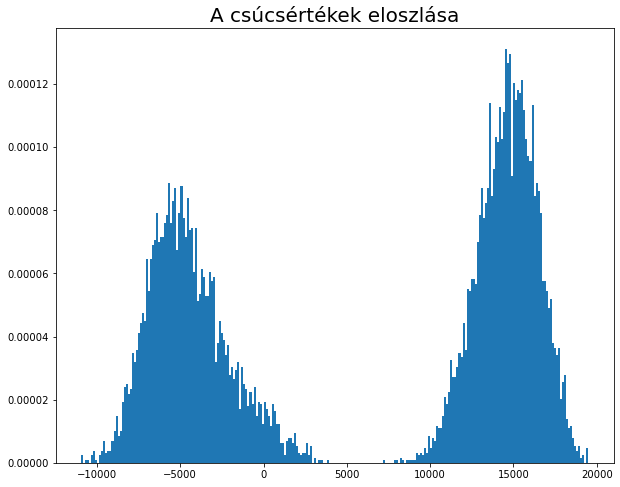

In [36]:
sample_ds, audio_ds = wavfile.read('doublescroll.wav')
peaks_ds=scipy.signal.find_peaks(audio_ds[:,0])
poincare_samples_ds = audio_chaos[peaks_ds[0],0]
hist_values4, bin_edges, _ = plt.hist(poincare_samples_ds, bins = 250, density = True) # densityvel végzem a normálást
plt.title("A csúcsértékek eloszlása", size = 20)

In [37]:
Entropia(hist_values4)

0.115078613883325697794

## 3. Attraktor - 4 pont

A kaotikus állapotban mérjük meg a rendszer Poincaré-leképezésbeli attraktorát! Az ábrát csatolja a jegyzőkönyvhöz!

A Poincare-metszetet közelítheti úgy, hogy a maximumhelyek sorozatát képezi. Azután készítse el a sorozathoz a _return_-mappeket, ami $a_i$ sorozat esetén az $(a_i, a_{i-l})$ pontok ábrázolását jelenti, $l$ egész eltolás. 

Mit tapasztal, ha $l$-et növeli? Hogy néz ki a _return_-map, ha nem a kaotikus tartományban vizsgálódunk, így a bifurkációk hogyan jelennek meg ebben az ábrázolásban?

In [38]:
sample_period, audio_period = wavfile.read('periodikus.wav')

sample_kettos, audio_kettos = wavfile.read("kettozodes.wav")

sample_kaosz, audio_kaosz = wavfile.read('kaotikus.wav')

sample_double, audio_double = wavfile.read('doublescroll.wav')

In [39]:
#periodikus

In [40]:
#1-es csatorna

Text(0.5, 1.0, ' l = 1000')

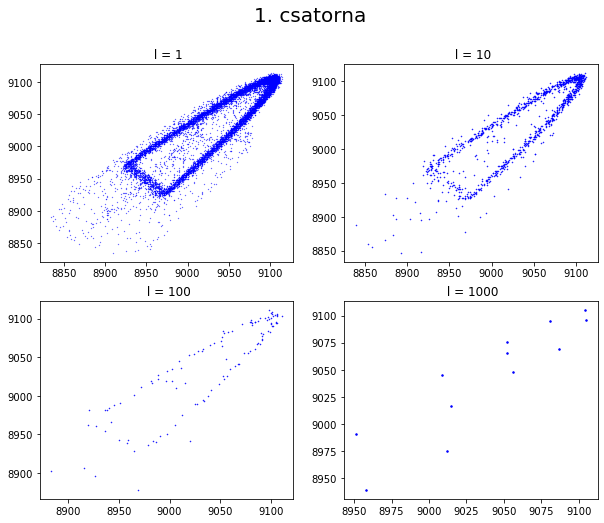

In [41]:
peaks_period=scipy.signal.find_peaks(audio_period[:,0])
poincare_samples_period = audio_period[peaks_period[0],0]
fig, axs = plt.subplots(2, 2)
fig.suptitle('1. csatorna', size = 20)
axs[0,0].plot(poincare_samples_period[1::1], poincare_samples_period[:-1:1], 'b.', ms = "0.5")
axs[0,0].set_title(" l = 1")
axs[0,1].plot(poincare_samples_period[1::10], poincare_samples_period[:-1:10], 'b.', ms = "1")
axs[0,1].set_title(" l = 10")
axs[1,0].plot(poincare_samples_period[1::100], poincare_samples_period[:-1:100], 'b.', ms = "1")
axs[1,0].set_title(" l = 100")
axs[1,1].plot(poincare_samples_period[1::1000], poincare_samples_period[:-1:1000], 'b.', ms = "3")
axs[1,1].set_title(" l = 1000")

In [42]:
#2-es csatorna

Text(0.5, 1.0, ' l = 1000')

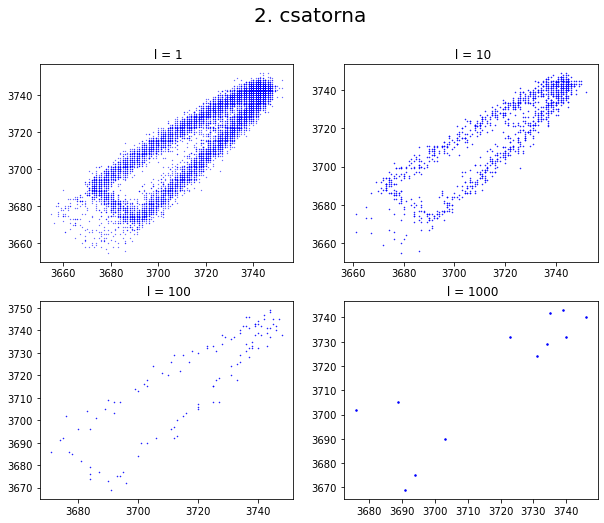

In [43]:
peaks_period=scipy.signal.find_peaks(audio_period[:,1])
poincare_samples_period = audio_period[peaks_period[0],1]
fig, axs = plt.subplots(2, 2)
fig.suptitle('2. csatorna', size = 20)
axs[0,0].plot(poincare_samples_period[1::1], poincare_samples_period[:-1:1], 'b.', ms = "0.5")
axs[0,0].set_title(" l = 1")
axs[0,1].plot(poincare_samples_period[1::10], poincare_samples_period[:-1:10], 'b.', ms = "1")
axs[0,1].set_title(" l = 10")
axs[1,0].plot(poincare_samples_period[1::100], poincare_samples_period[:-1:100], 'b.', ms = "1")
axs[1,0].set_title(" l = 100")
axs[1,1].plot(poincare_samples_period[1::1000], poincare_samples_period[:-1:1000], 'b.', ms = "3")
axs[1,1].set_title(" l = 1000")

In [44]:
#kettőződés

Text(0.5, 1.0, ' l = 1000')

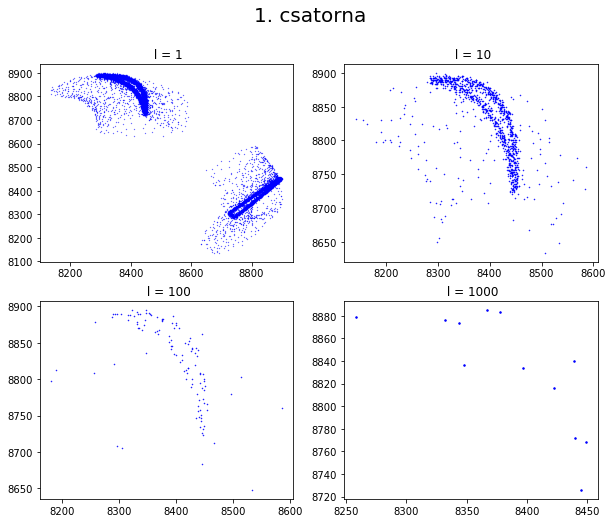

In [45]:
peaks_period=scipy.signal.find_peaks(audio_kettos[:,0])
poincare_samples_period = audio_kettos[peaks_period[0],0]
fig, axs = plt.subplots(2, 2)
fig.suptitle('1. csatorna', size = 20)
axs[0,0].plot(poincare_samples_period[1::1], poincare_samples_period[:-1:1], 'b.', ms = "0.5")
axs[0,0].set_title(" l = 1")
axs[0,1].plot(poincare_samples_period[1::10], poincare_samples_period[:-1:10], 'b.', ms = "1")
axs[0,1].set_title(" l = 10")
axs[1,0].plot(poincare_samples_period[1::100], poincare_samples_period[:-1:100], 'b.', ms = "1")
axs[1,0].set_title(" l = 100")
axs[1,1].plot(poincare_samples_period[1::1000], poincare_samples_period[:-1:1000], 'b.', ms = "3")
axs[1,1].set_title(" l = 1000")

In [46]:
#2-es csatorna

Text(0.5, 1.0, ' l = 1000')

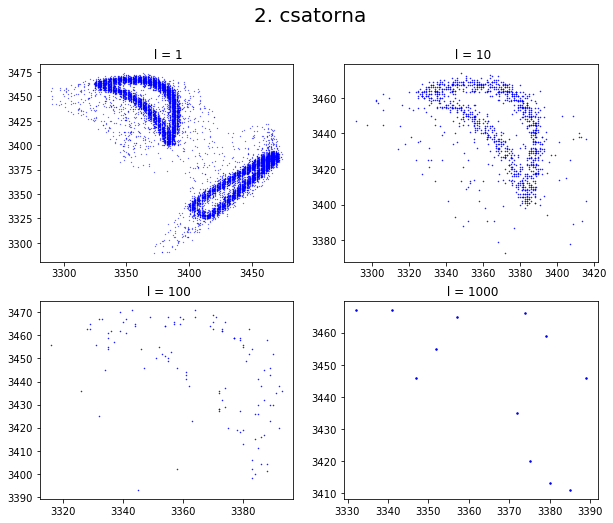

In [47]:
peaks_period=scipy.signal.find_peaks(audio_kettos[:,1])
poincare_samples_period = audio_kettos[peaks_period[0],1]
fig, axs = plt.subplots(2, 2)
fig.suptitle('2. csatorna', size = 20)
axs[0,0].plot(poincare_samples_period[1::1], poincare_samples_period[:-1:1], 'b.', ms = "0.5")
axs[0,0].set_title(" l = 1")
axs[0,1].plot(poincare_samples_period[1::10], poincare_samples_period[:-1:10], 'b.', ms = "1")
axs[0,1].set_title(" l = 10")
axs[1,0].plot(poincare_samples_period[1::100], poincare_samples_period[:-1:100], 'b.', ms = "1")
axs[1,0].set_title(" l = 100")
axs[1,1].plot(poincare_samples_period[1::1000], poincare_samples_period[:-1:1000], 'b.', ms = "3")
axs[1,1].set_title(" l = 1000")

In [48]:
#kaotikus

Text(0.5, 1.0, ' l = 1000')

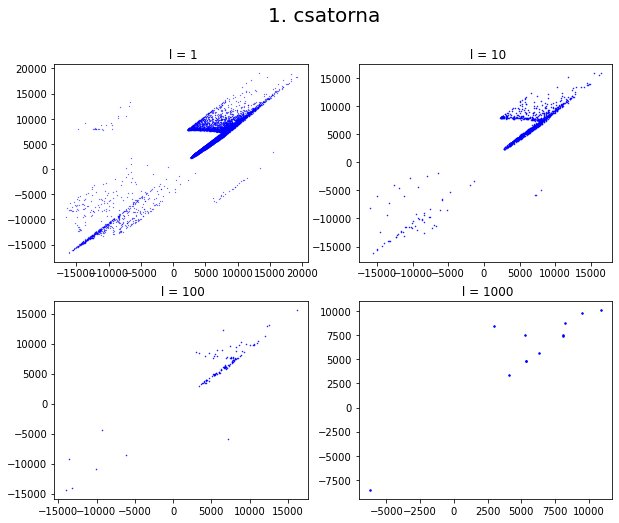

In [49]:
peaks_period=scipy.signal.find_peaks(audio_kaosz[:,0])
poincare_samples_period = audio_kaosz[peaks_period[0],0]
fig, axs = plt.subplots(2, 2)
fig.suptitle('1. csatorna', size = 20)
axs[0,0].plot(poincare_samples_period[1::1], poincare_samples_period[:-1:1], 'b.', ms = "0.5")
axs[0,0].set_title(" l = 1")
axs[0,1].plot(poincare_samples_period[1::10], poincare_samples_period[:-1:10], 'b.', ms = "1")
axs[0,1].set_title(" l = 10")
axs[1,0].plot(poincare_samples_period[1::100], poincare_samples_period[:-1:100], 'b.', ms = "1")
axs[1,0].set_title(" l = 100")
axs[1,1].plot(poincare_samples_period[1::1000], poincare_samples_period[:-1:1000], 'b.', ms = "3")
axs[1,1].set_title(" l = 1000")

Text(0.5, 1.0, ' l = 1000')

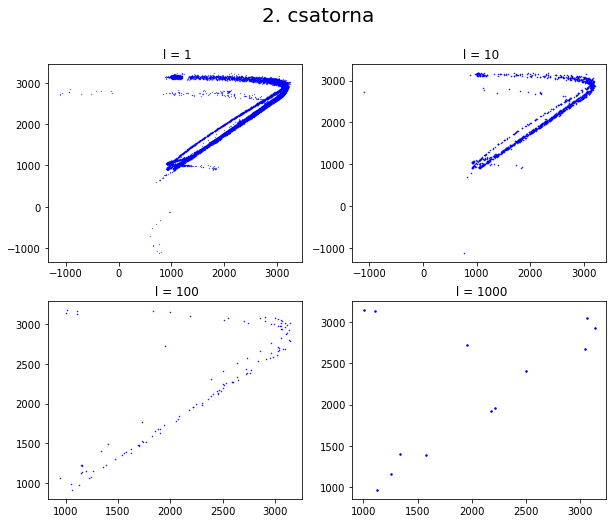

In [50]:
peaks_period=scipy.signal.find_peaks(audio_kaosz[:,1])
poincare_samples_period = audio_kaosz[peaks_period[0],1]
fig, axs = plt.subplots(2, 2)
fig.suptitle('2. csatorna', size = 20)
axs[0,0].plot(poincare_samples_period[1::1], poincare_samples_period[:-1:1], 'b.', ms = "0.5")
axs[0,0].set_title(" l = 1")
axs[0,1].plot(poincare_samples_period[1::10], poincare_samples_period[:-1:10], 'b.', ms = "1")
axs[0,1].set_title(" l = 10")
axs[1,0].plot(poincare_samples_period[1::100], poincare_samples_period[:-1:100], 'b.', ms = "1")
axs[1,0].set_title(" l = 100")
axs[1,1].plot(poincare_samples_period[1::1000], poincare_samples_period[:-1:1000], 'b.', ms = "3")
axs[1,1].set_title(" l = 1000")

In [51]:
#scroll

Text(0.5, 1.0, ' l = 1000')

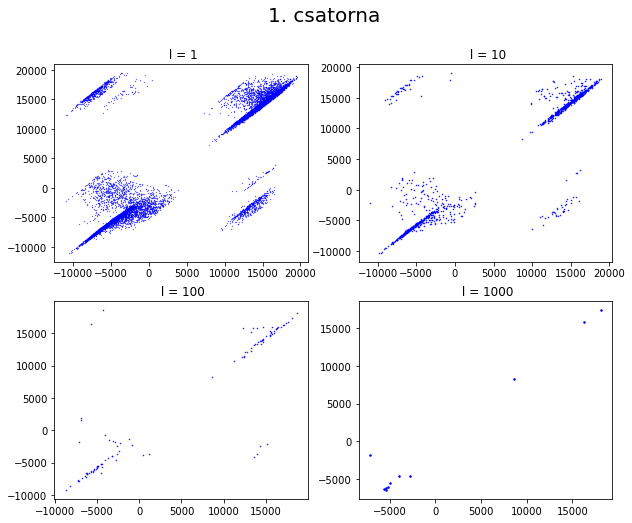

In [52]:
peaks_period=scipy.signal.find_peaks(audio_double[:,0])
poincare_samples_period = audio_double[peaks_period[0],0]
fig, axs = plt.subplots(2, 2)
fig.suptitle('1. csatorna', size = 20)
axs[0,0].plot(poincare_samples_period[1::1], poincare_samples_period[:-1:1], 'b.', ms = "0.5")
axs[0,0].set_title(" l = 1")
axs[0,1].plot(poincare_samples_period[1::10], poincare_samples_period[:-1:10], 'b.', ms = "1")
axs[0,1].set_title(" l = 10")
axs[1,0].plot(poincare_samples_period[1::100], poincare_samples_period[:-1:100], 'b.', ms = "1")
axs[1,0].set_title(" l = 100")
axs[1,1].plot(poincare_samples_period[1::1000], poincare_samples_period[:-1:1000], 'b.', ms = "3")
axs[1,1].set_title(" l = 1000")

Text(0.5, 1.0, ' l = 1000')

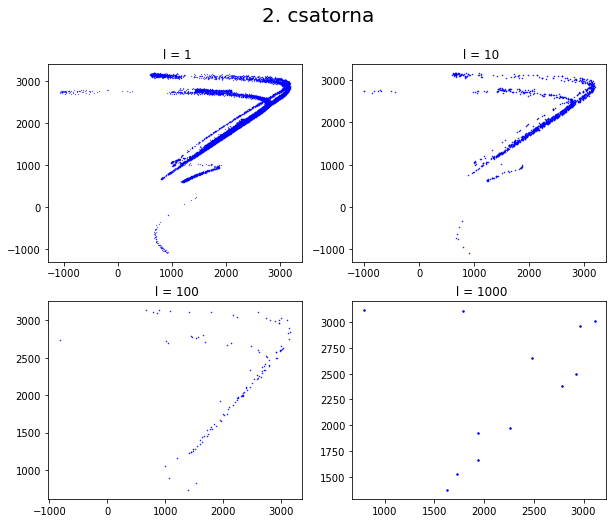

In [53]:
peaks_period=scipy.signal.find_peaks(audio_double[:,1])
poincare_samples_period = audio_double[peaks_period[0],1]
fig, axs = plt.subplots(2, 2)
fig.suptitle('2. csatorna', size = 20)
axs[0,0].plot(poincare_samples_period[1::1], poincare_samples_period[:-1:1], 'b.', ms = "0.5")
axs[0,0].set_title(" l = 1")
axs[0,1].plot(poincare_samples_period[1::10], poincare_samples_period[:-1:10], 'b.', ms = "1")
axs[0,1].set_title(" l = 10")
axs[1,0].plot(poincare_samples_period[1::100], poincare_samples_period[:-1:100], 'b.', ms = "1")
axs[1,0].set_title(" l = 100")
axs[1,1].plot(poincare_samples_period[1::1000], poincare_samples_period[:-1:1000], 'b.', ms = "3")
axs[1,1].set_title(" l = 1000")

## 4. feladat: A logisztikus leképezés vizsgálata - 3 pont

Írjon rövid `python` programot, ami adott $r$ kontrollparaméter és $x_0$ kezdeti feltétel mellett meghatározza a logisztikus leképezés első $N$ lépését. A logisztikus leképezés iteratív formulája a következő:
$$x_{n+1} = r x_n (1 - x_n).$$

Ábrázolja a kapott értékek eloszlását a bifurkálódott és a kaotikus tartományban!

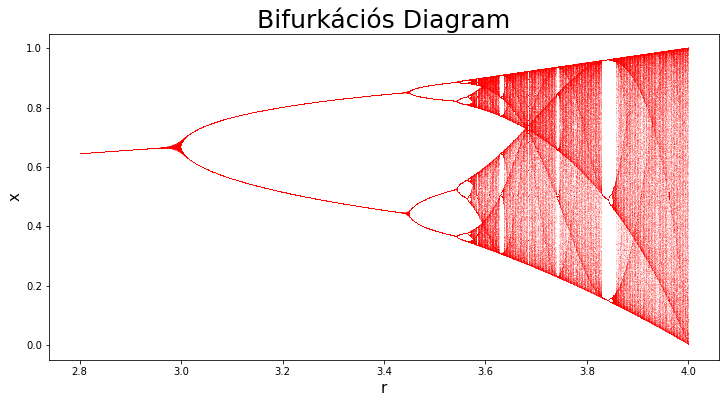

In [56]:
def lekep(r, x):
    return r * x * (1 - x)

def abra(r, x_0, N_hibás, N):
    r_values = []
    x_values = []

    for r in r: #végig iterálnuk a kontroll paraméter értékein
        x = x_0
        
        
        for i in range(N_hibás): #A jegyzethet képest érdekesen deformálodott ábrák jöttek ki
            x = lekep(r, x) #viszont az első pár lépés kihagyásával mintha megoldodott volna probléma
        
        for i in range(N): # kiszámoljuk N lépésre a logisztikus leképezés értékét minden r- esetére
            x = lekep(r, x)
            r_values.append(r)
            x_values.append(x)

    return r_values, x_values

#paraméterek
N = 1000
r = linspace(2.8,4,N) 
x_0 = 0.5 #jegyzet alapján
N_hibás = 100

r_values, x_values = abra(r, x_0, N_hibás, N)


plt.figure(figsize=(12, 6))
plt.plot(r_values[120:], x_values[120:], ',k', alpha=0.1, markersize=0.2, color ="r")
plt.xlabel('r', size = 15)
plt.ylabel('x', size = 15)
plt.title('Bifurkációs Diagram', size = 25)
plt.show()
